Problem 1- Book

In [44]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [46]:
from google.colab import files 
uploaded=files.upload()

Saving book.csv to book (1).csv


In [47]:
book = pd.read_csv("book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [48]:
df=pd.get_dummies(book)
df.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


# Apriori Algorithm 

In [49]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


In [50]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [72]:
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
448,(V3_Sixth Sense),"(Patriot, Sixth Sense, V2_Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
497,"(V1_Gladiator, Sixth Sense)","(V3_Sixth Sense, V2_Patriot, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
494,"(V3_Sixth Sense, V1_Gladiator, Patriot)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
492,"(V3_Sixth Sense, V2_Patriot, Patriot)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
491,"(V3_Sixth Sense, V2_Patriot, V1_Gladiator)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
490,"(V1_Gladiator, Sixth Sense, Patriot)","(V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
487,"(Sixth Sense, V2_Patriot, Patriot)","(V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
486,"(V1_Gladiator, Sixth Sense, V2_Patriot)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
482,"(V1_Gladiator, Sixth Sense, V2_Patriot, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
478,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense, V2_Patriot, Gladia...",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [71]:
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
448,(V3_Sixth Sense),"(Patriot, Sixth Sense, V2_Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
497,"(V1_Gladiator, Sixth Sense)","(V3_Sixth Sense, V2_Patriot, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
494,"(V3_Sixth Sense, V1_Gladiator, Patriot)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
492,"(V3_Sixth Sense, V2_Patriot, Patriot)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
491,"(V3_Sixth Sense, V2_Patriot, V1_Gladiator)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
490,"(V1_Gladiator, Sixth Sense, Patriot)","(V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
487,"(Sixth Sense, V2_Patriot, Patriot)","(V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
486,"(V1_Gladiator, Sixth Sense, V2_Patriot)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
482,"(V1_Gladiator, Sixth Sense, V2_Patriot, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
478,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense, V2_Patriot, Gladia...",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [73]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V2_Patriot),"(Sixth Sense, Gladiator, V3_Sixth Sense, V1_Gl...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(Gladiator),"(Sixth Sense, V2_Patriot, V3_Sixth Sense, V1_G...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
599,(V1_Gladiator),"(Sixth Sense, V2_Patriot, Gladiator, V3_Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(V3_Sixth Sense),"(Sixth Sense, V2_Patriot, Gladiator, V1_Gladia...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


In [74]:
import matplotlib.pyplot as plt


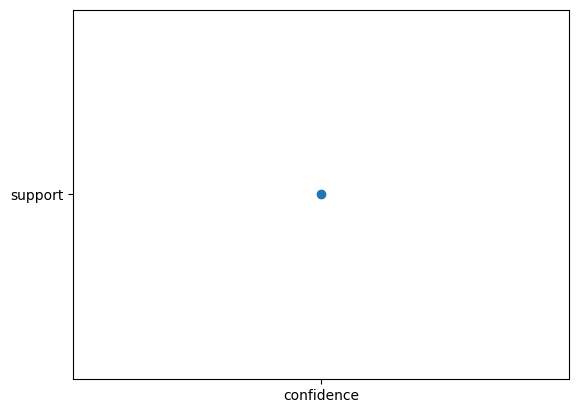

In [75]:
x_values = ['confidence'] 
y_values = ['support']  
plt.scatter(x_values, y_values)


Problem 2-Movies

In [56]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [58]:
from google.colab import files 
uploaded=files.upload()

Saving movies.csv to movies (1).csv


In [59]:
movies = pd.read_csv("movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [60]:
df=pd.get_dummies(movies)
df.head(10)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [61]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Sixth Sense, V2_Patriot, Gladiator, V3_Sixth ..."
59,0.4,"(Sixth Sense, V2_Patriot, Gladiator, V3_Sixth ..."
60,0.4,"(Sixth Sense, V2_Patriot, V3_Sixth Sense, V1_G..."
61,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, V1_Gla..."


In [62]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V2_Patriot),"(Sixth Sense, Gladiator, V3_Sixth Sense, V1_Gl...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(Gladiator),"(Sixth Sense, V2_Patriot, V3_Sixth Sense, V1_G...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
599,(V1_Gladiator),"(Sixth Sense, V2_Patriot, Gladiator, V3_Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(V3_Sixth Sense),"(Sixth Sense, V2_Patriot, Gladiator, V1_Gladia...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


In [63]:
rules.sort_values('lift',ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
448,(V3_Sixth Sense),"(Patriot, Sixth Sense, V2_Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
497,"(V1_Gladiator, Sixth Sense)","(V3_Sixth Sense, V2_Patriot, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
494,"(V3_Sixth Sense, V1_Gladiator, Patriot)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
492,"(V3_Sixth Sense, V2_Patriot, Patriot)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
491,"(V3_Sixth Sense, V2_Patriot, V1_Gladiator)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
490,"(V1_Gladiator, Sixth Sense, Patriot)","(V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
487,"(Sixth Sense, V2_Patriot, Patriot)","(V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
486,"(V1_Gladiator, Sixth Sense, V2_Patriot)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
482,"(V1_Gladiator, Sixth Sense, V2_Patriot, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
478,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense, V2_Patriot, Gladia...",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [64]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
448,(V3_Sixth Sense),"(Patriot, Sixth Sense, V2_Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
497,"(V1_Gladiator, Sixth Sense)","(V3_Sixth Sense, V2_Patriot, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
494,"(V3_Sixth Sense, V1_Gladiator, Patriot)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
492,"(V3_Sixth Sense, V2_Patriot, Patriot)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
491,"(V3_Sixth Sense, V2_Patriot, V1_Gladiator)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
490,"(V1_Gladiator, Sixth Sense, Patriot)","(V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
487,"(Sixth Sense, V2_Patriot, Patriot)","(V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
486,"(V1_Gladiator, Sixth Sense, V2_Patriot)","(V3_Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
482,"(V1_Gladiator, Sixth Sense, V2_Patriot, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
478,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense, V2_Patriot, Gladia...",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [65]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V2_Patriot),"(Sixth Sense, Gladiator, V3_Sixth Sense, V1_Gl...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(Gladiator),"(Sixth Sense, V2_Patriot, V3_Sixth Sense, V1_G...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
599,(V1_Gladiator),"(Sixth Sense, V2_Patriot, Gladiator, V3_Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(V3_Sixth Sense),"(Sixth Sense, V2_Patriot, Gladiator, V1_Gladia...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


In [66]:
import pandas as pd
import matplotlib.pyplot as plt


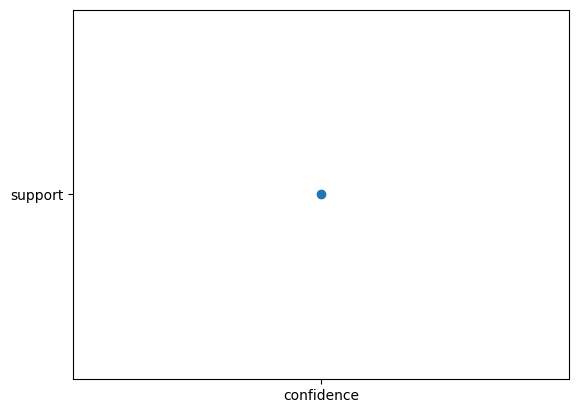

In [67]:
x_values = ['confidence'] 
y_values = ['support']  
plt.scatter(x_values, y_values)
